# ipywidgets

In [2]:
import pandas as pd
import glob
import os
import tqdm
import gc
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import numpy as np

In [ ]:
# Imports for JupyterLite
%pip install -q ipywidgets

In [ ]:
import ipywidgets as widgets

In [130]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [131]:
widgets.Dropdown(
    options=[('One', 1), ('Two', 2), ('Three', 3)],
    value=2,
    description='Number:',
)

Dropdown(description='Number:', index=1, options=(('One', 1), ('Two', 2), ('Three', 3)), value=2)

In [132]:
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False,
    indent=False
)

Checkbox(value=False, description='Check me', indent=False)

In [133]:
widgets.ToggleButton(
    value=False,
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

ToggleButton(value=False, description='Click me', icon='check', tooltip='Description')

In [134]:
widgets.FloatText(
    value=7.5,
    description='Any:',
    disabled=False
)

FloatText(value=7.5, description='Any:')

In [135]:
widgets.FloatRangeSlider(
    value=[5, 7.5],
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatRangeSlider(value=(5.0, 7.5), continuous_update=False, description='Test:', max=10.0, readout_format='.1f…

In [136]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, orientation='vertical', readout…

In [137]:
import datetime
dates = [datetime.date(2015, i, 1) for i in range(1, 13)]
options = [(i.strftime('%b'), i) for i in dates]
widgets.SelectionRangeSlider(
    options=options,
    index=(0, 11),
    description='Months (2015)',
    disabled=False
)

SelectionRangeSlider(description='Months (2015)', index=(0, 11), options=(('Jan', datetime.date(2015, 1, 1)), …

In [141]:
h=widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

In [142]:
h

DatePicker(value=None, description='Pick a Date', step=1)

In [143]:
h

DatePicker(value=datetime.date(2024, 1, 16), description='Pick a Date', step=1)

In [144]:
print(h)

DatePicker(value=datetime.date(2024, 2, 19), description='Pick a Date', step=1)


In [145]:
h.value

datetime.date(2024, 2, 19)

In [138]:
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

In [146]:
widgets.TimePicker(
    description='Pick a Time',
    disabled=False
)

TimePicker(value=None, description='Pick a Time', step=60.0)

In [147]:
widgets.DatetimePicker(
    description='Pick a Time',
    disabled=False
)

DatetimePicker(value=None, description='Pick a Time')

In [139]:
floatsinput = widgets.FloatsInput(
    value=[1.3, 4.56, 78.90],
    tag_style='info',
    format = '.2f'
)
floatsinput

FloatsInput(value=[1.3, 4.56, 78.9], format='.2f', tag_style='info')

In [148]:
widgets.FileUpload(
    accept='',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

FileUpload(value=(), description='Upload')

In [151]:
accordion = widgets.Accordion(children=[widgets.IntSlider(), widgets.Text()], titles=('Slider', 'Text'))
accordion

Accordion(children=(IntSlider(value=0), Text(value='')), titles=('Slider', 'Text'))

In [152]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = [str(i) for i in range(len(children))]
tab

In [153]:
def f(x):
    return x

In [154]:
interact(f, x=10);


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [155]:
interact(f, x=True);


interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [161]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [162]:
def h(p, q):
    return (p, q)

In [163]:
interact(h, p=5, q=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

In [164]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [165]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Примеры использования для визуализации

In [96]:
dfs = {}
for f in tqdm.tqdm(glob.glob("data/*.csv")):
    key = os.path.basename(os.path.splitext(f)[0])
    dfs[key] = pd.read_csv(f, decimal=",", sep=";")
    dfs[key]=dfs[key].dropna()


100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 45.00it/s]


In [122]:
#Дата выбирается ключу, а Параметры по столбцам за исключением первого
dfs = dict(sorted(dfs.items()))
date=dfs.keys()
# parametrs=NAMES[2:]
all_data = pd.concat(dfs.values())
datelist=sorted(list(date))

In [123]:
date

dict_keys(['day1', 'day2'])

In [127]:
datelist

['day1', 'day2']

In [125]:
all_data = pd.concat(dfs.values())
all_data

,datetime,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,0:00:00,700.0,2.493592,11.790927,3.178981,84.144163,81.632187,1.0
1,0:00:01,876.0,2.941606,16.193866,2.464504,77.640934,82.445724,0.0
2,0:00:02,520.0,2.961746,6.553147,1.064347,77.752266,79.645777,1.0
3,0:00:03,473.0,3.707835,19.510172,3.727455,74.129907,71.774629,1.0
4,0:00:04,619.0,5.672919,15.738871,2.052251,78.396989,87.000225,0.0
...,...,...,...,...,...,...,...,...
10532,5:25:30,902.0,4.117296,4.981360,4.346564,75.951627,87.925087,1.0
10533,5:25:31,694.0,4.817720,10.866701,6.186689,75.281430,74.928459,1.0
10534,5:25:32,684.0,2.673344,4.927376,1.903572,76.844940,86.337345,1.0
10535,5:25:33,696.0,3.094163,8.291816,1.221729,77.179693,73.624396,1.0


['day1', 'day2']

In [107]:
gc.collect()

41340

In [108]:
NAMES = all_data.columns.tolist()
parametrs=NAMES[1:]

In [109]:
dfs['day1']

,datetime,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,0:00:00,700.0,2.493592,11.790927,3.178981,84.144163,81.632187,1.0
1,0:00:01,876.0,2.941606,16.193866,2.464504,77.640934,82.445724,0.0
2,0:00:02,520.0,2.961746,6.553147,1.064347,77.752266,79.645777,1.0
3,0:00:03,473.0,3.707835,19.510172,3.727455,74.129907,71.774629,1.0
4,0:00:04,619.0,5.672919,15.738871,2.052251,78.396989,87.000225,0.0
...,...,...,...,...,...,...,...,...
8993,2:29:53,1685.0,3.644679,6.772686,2.555021,76.697739,78.783931,1.0
8994,2:29:54,756.0,4.076108,4.853825,1.333752,75.476114,72.029447,1.0
8995,2:29:55,719.0,4.749267,2.876057,4.235383,78.723644,72.888508,0.0
8996,2:29:56,838.0,2.465974,4.409658,3.837212,77.098273,75.238038,0.0


In [110]:
dfs['day2']

,datetime,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,2:29:58,870,3.296781,7.924853,1.223904,78.247832,75.147173,1
1,2:29:59,883,2.560432,5.920422,2.495217,77.315226,81.016463,0
2,2:30:00,1306,4.192702,7.469689,1.577814,74.282264,73.646172,0
3,2:30:01,618,3.967139,5.503653,2.469426,82.131286,85.834677,1
4,2:30:02,850,2.975568,5.633407,3.462603,83.376916,83.915987,0
...,...,...,...,...,...,...,...,...
10532,5:25:30,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
10533,5:25:31,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
10534,5:25:32,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
10535,5:25:33,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [113]:
#Нужно доработать конкат сейчас при 2 по 3 возвращает 3ий день а не диапазон
def norm(x, b, Параметр):
    day1, day2 = [int(day) for day in b]
#     print(datelist[day1:day2])
    df = pd.concat([dfs[day] for day in datelist[day1:day2+1]])
    dat1 = df[NAMES[1:]][:100000].reset_index()[[Параметр]]
    ax = dat1.plot(alpha=0.5, lw=10)
    dat2 = dat1.rolling(window=x, center=False).mean()
    dat2.plot(color=["r", "b"], ax=ax, legend=False, zorder=-10)
    
interact(norm, x=(10, 1000), b=widgets.IntRangeSlider(
    
    min=0,
    max=1,
    step=1,
    description='Date:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
), Параметр=parametrs)

interactive(children=(IntSlider(value=505, description='x', max=1000, min=10), IntRangeSlider(value=(0, 0), co…

<function __main__.norm(x, b, Параметр)>

In [114]:
def f(x, Дата, Параметр):
    df = dfs[ Дата]
    dat1 = df[NAMES[1:]][:100000].reset_index()[[Параметр]]
    ax = dat1.plot(alpha=0.5, lw=10)
    dat2 = dat1.rolling(window=x, center=False).mean()
    dat2.plot(color=["r", "b"], ax=ax, legend=False, zorder=-10)
    
interact(f, x=(1, 100), Дата=date, Параметр=parametrs)

interactive(children=(IntSlider(value=50, description='x', min=1), Dropdown(description='Дата', options=('day1…

<function __main__.f(x, Дата, Параметр)>

In [115]:
def norm(x, Дата, Параметр1, Параметр2):
    df=dfs[Дата]
    dat1 = df[NAMES[1:]][:100000].reset_index()[[Параметр1, Параметр2,]]
    dat1.plot()
    dat1_norm = (dat1 - dat1.mean()) / (dat1.max() - dat1.min())
    dat2 = dat1_norm.rolling(x, win_type="triang").sum()
    dat2.plot() 
        
interact(norm, x=(1, 1000), Дата=date, Параметр1=parametrs, Параметр2=parametrs)

interactive(children=(IntSlider(value=500, description='x', max=1000, min=1), Dropdown(description='Дата', opt…

<function __main__.norm(x, Дата, Параметр1, Параметр2)>

In [121]:
def den(Дата, Параметр1, Параметр2):
    g = sns.jointplot(x=Параметр1, y=Параметр2, 
                  data=dfs[Дата],
                  kind="reg",
                  color="r")

interact(den, Дата=date, Параметр1=parametrs, Параметр2=parametrs)

interactive(children=(Dropdown(description='Дата', options=('day1', 'day2'), value='day1'), Dropdown(descripti…

<function __main__.den(Дата, Параметр1, Параметр2)>

In [128]:
def gstat(Дата):
     df=dfs[Дата]
     display(df.describe())
interact(gstat, Дата=date)

interactive(children=(Dropdown(description='Дата', options=('day1', 'day2'), value='day1'), Output()), _dom_cl…

<function __main__.gstat(Дата)>

In [129]:
def corrmap(Дата, Параметр1, Параметр2, Параметр3, Параметр4, Параметр5, Параметр6):
    df=dfs[Дата]
    dfn=df[[Параметр1, Параметр2, Параметр3, Параметр4, Параметр5, Параметр6]]
    corr = dfn.corr()
    sns.heatmap(
    corr, 
    xticklabels=corr.columns.values, 
    yticklabels=corr.columns.values);

interact(corrmap, Дата=date, Параметр1=parametrs, Параметр2=parametrs, Параметр3=parametrs, Параметр4=parametrs, Параметр5=parametrs, Параметр6=parametrs)

interactive(children=(Dropdown(description='Дата', options=('day1', 'day2'), value='day1'), Dropdown(descripti…

<function __main__.corrmap(Дата, Параметр1, Параметр2, Параметр3, Параметр4, Параметр5, Параметр6)>

# Еще немного про визуализацию

In [166]:
import pygal
from IPython.display import SVG, HTML

In [167]:
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [176]:
# stackedline_chart = pygal.StackedLine(fill=True)
# # stackedline_chart.title = dfs.Lin
# stackedline_chart.x_labels = all_data['Engine rpm']
# stackedline_chart.add('Engine rpm', all_data['Engine rpm'])
# stackedline_chart.add('lub oil temp',  all_data['lub oil temp'])



# HTML(html_pygal.format(pygal_render=stackedline_chart.render()))

In [168]:
parametrs

['Engine rpm',
 'Lub oil pressure',
 'Fuel pressure',
 'Coolant pressure',
 'lub oil temp',
 'Coolant temp',
 'Engine Condition']

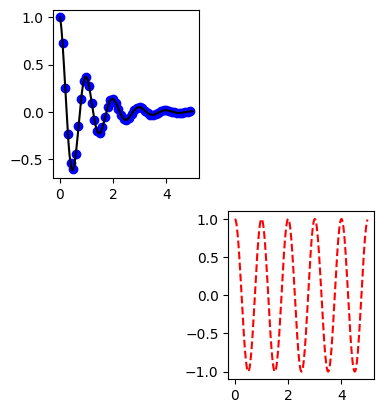

In [177]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(231)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(235)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

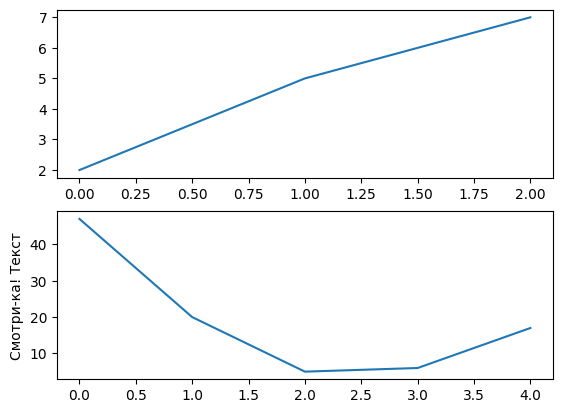

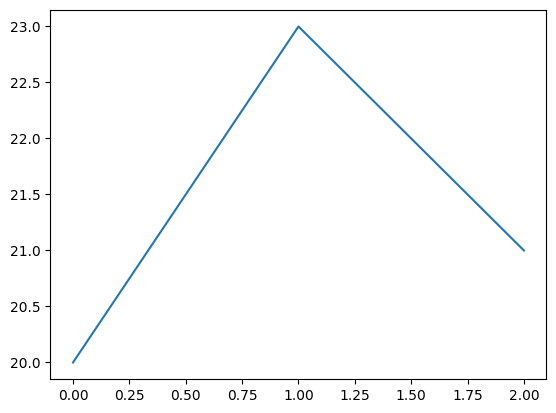

In [178]:
plt.figure(1)
plt.subplot(211)
plt.plot([2, 5, 7])
plt.subplot(212)
plt.plot([47, 20, 5, 6, 17])
plt.ylabel("Смотри-ка! Текст")

plt.figure(2)
plt.plot([20, 23, 21])

plt.show()

# Plotly

Plotly — библиотека для визуализации данных, состоящая из нескольких частей:



Документация - https://plotly.com/graphing-libraries/

Так же на базе plotly и веб-сервера Flask существует специальная библиотека для создания дашбордов Dash - https://dash.plotly.com/m

Plotly - бесплатная библиотека, которую вы можете использовать в коммерческих целях



Plotly работает offline
Plotly позволяет строить интерактивные визуализации




Т.е. с помощью Plotly можно как изучать какие-то данные "на лету" (не перестраивая график в matplotlib, изменяя масштаб, включая/выключая какие-то данные), так и построить полноценный интерактивный отчёт (дашборд).



Перед началом работы необходимо импортировать модуль. В разных частях нашего занятия для разных задач нам понадобятся как основной модуль, так и один из его подмодулей, поэтому полный набор инструкций импорта у нас:



In [183]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [179]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


###### Линейный график



Начнём с простой задачи построения графика по точкам.



Используем функцию


$$f(x) = x^2$$

Сперва поступим совсем просто и "в лоб":



Создадим график с помощью функции scatter из подмодуля plotly.express (внутрь передадим 2 списка точек: координаты X и Y)



Тут же "покажем" его с помозью метода show()



Обратите внимание - график интерактивный, если навести на него курсор, то можно его приближать и удалять, выделять участки, по наведению курсора на точку получать подробную информацию, возвращать картинку в исходное положение, а при необходимости "скриншотить" и сохранять как файл.



Всё это делается с помощью JS в вашем браузере. А значит, при желании вы можете этим управлять уже после построения фигуры (но мы этого делать пожалуй не будем, т.к. JS != Python)



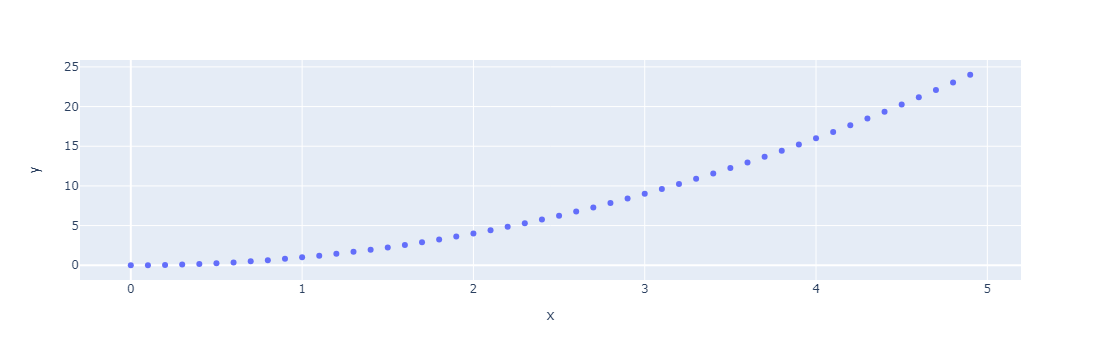

In [189]:
x = np.arange(0, 5, 0.1)
def f(x):
    return x**2

px.scatter(x=x, y=f(x)).show()

Более читабельно и правильно записать тот же в код в следующем виде:



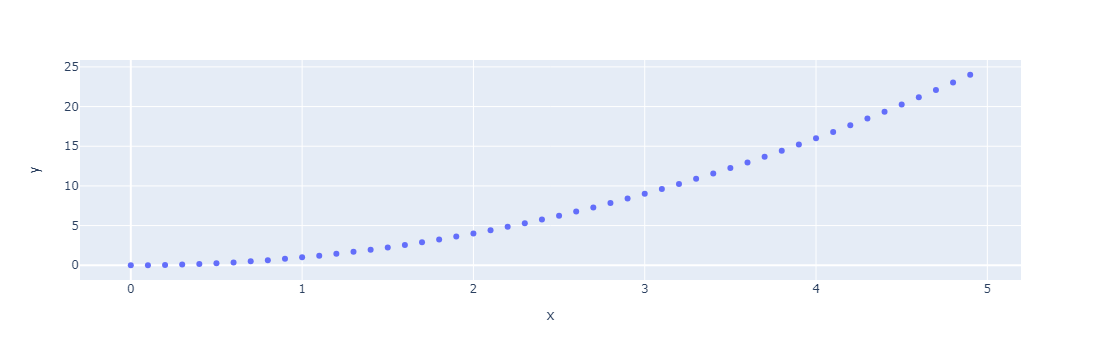

In [190]:
fig = px.scatter(x=x, y=f(x))
fig.show()

    1  Создаём фигуру
    2 Рисуем график
    3 Показываем фигуру

2 строчки и готовый результат. Т.к. мы используем Express. Быстро и просто.



Но маловато гибкости



Чтобы добавить что на график нам понадобится метод фигуры add_trace.



fig.add_trace(ТУТ_ТО_ЧТО_ХОТИМ_ПЕРЕДАТЬ_ДЛЯ_ОТОБРАЖЕНИЯ_И_ГДЕ)



In [ ]:
Но ЧТО мы хотим нарисовать? График по точкам. График мы уже рисовали с помощью Scatter в Экспрессе, у Объектов есть свой Scatter, давайте глянем что он делает:



In [191]:
go.Scatter(x=x, y=f(x))


Scatter({
    'x': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
                1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
                4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
    'y': array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
                3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
                1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
                3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
                5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
                9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
                1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01, 1.600e+01, 1.681e+01,
                1.764e+01, 1.849e+01, 1.936e+01, 2.025e+01, 2.116e+01, 2.209e+01,
                2.

In [ ]:
А теперь объединим:



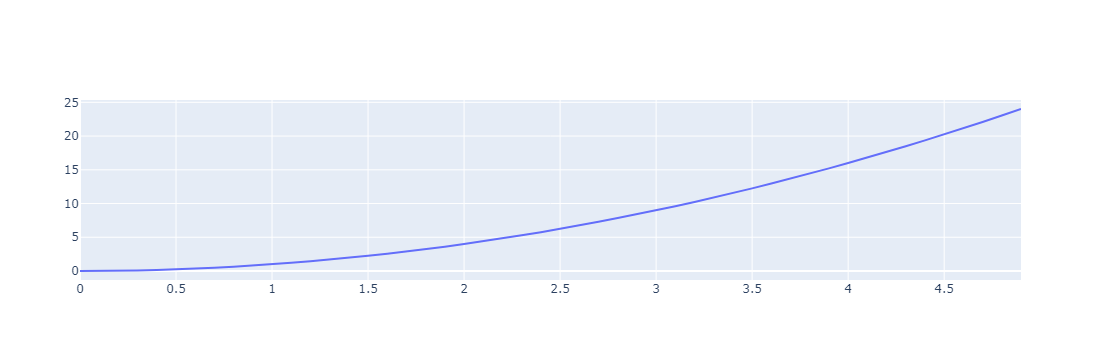

In [192]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.show()

In [ ]:
Как видим, отличия не только в коде, но и в результате - получилась гладкая кривая.



In [ ]:
Кроме того, такой способ позволит нам нанести на график столько кривых, сколько мы хотим:



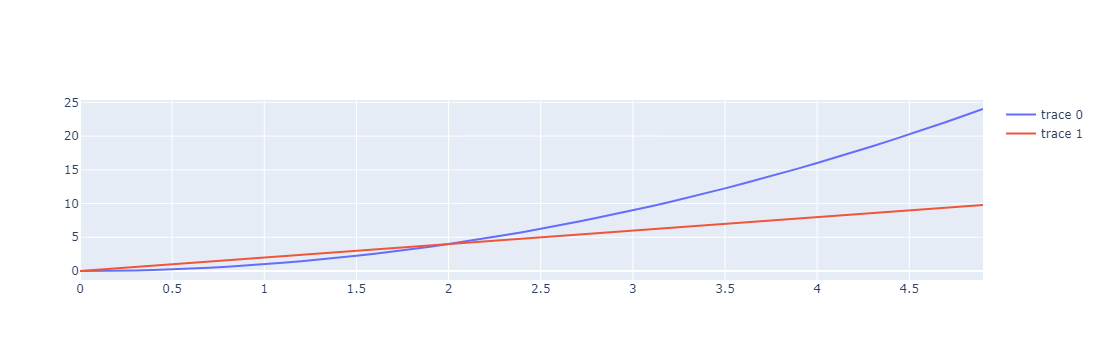

In [193]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=x*2))
fig.show()

###### Подписи графиков


In [ ]:
Добавим атрибут name, в который передадим строку с именем графика, которое мы хотим отображать в легенде.



In [ ]:
Plotly поддерживает LATEX в подписях (аналогично matplotlib через использование $$ с обеих сторон).



In [205]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='$$f(x)=x^2$$'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()

In [206]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()

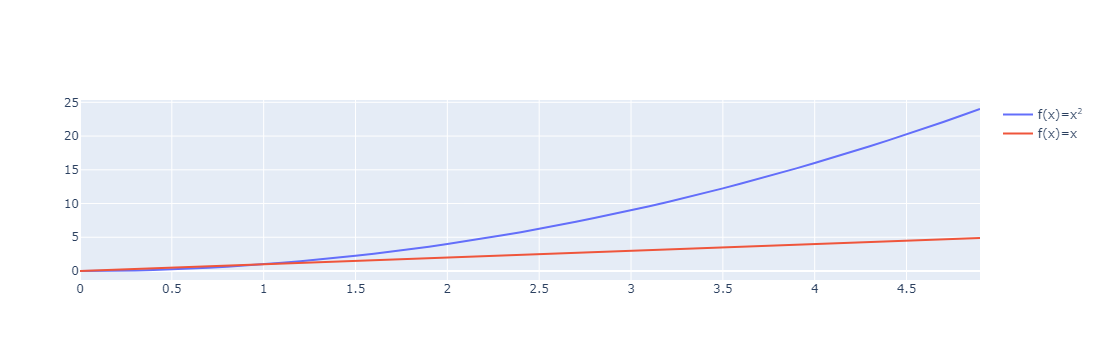

In [209]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x,name='f(x)=x<sup></sup>' ))
fig.show()

In [ ]:
К сожалению, это имеет свои ограничения, как можно заметить подсказка при наведении на график отображается в "сыром" виде, а не в LATEX.



In [ ]:
Победить это можно, если использовать HTML разметку в подписях. В данном примере я буду использовать тег sup. Так же заметьте, что шрифт для LATEX и HTML отличается начертанием.



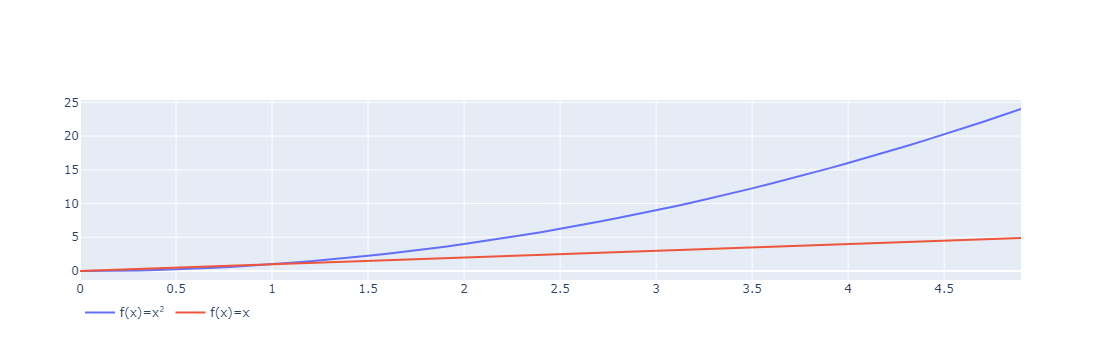

In [210]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x,name='f(x)=x<sup></sup>' ))
fig.update_layout(legend_orientation="h")
fig.show()

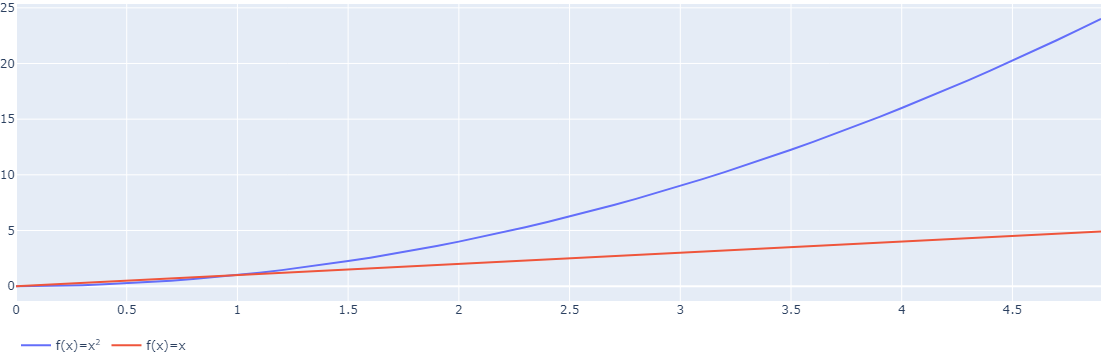

In [211]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x,name='f(x)=x<sup></sup>' ))
fig.update_layout(legend_orientation="h", 
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="x+y")
fig.show()

In [ ]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5])
fig.update_xaxes(range=[-0.5, 1.5])
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [ ]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [ ]:
def h(x):
    return np.sin(x)

def k(x):
    return np.cos(x)

def m(x):
    return np.tan(x)


fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')

fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'))

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Plot 1", "Plot 2"))

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=40, b=0))
fig.update_layout(title="Plot Title")
fig.update_xaxes(title='Ось X графика 1', col=1, row=1)
fig.update_xaxes(title='Ось X графика 2', col=2, row=1)
fig.update_yaxes(title='Ось Y графика 1', col=1, row=1)
fig.update_yaxes(title='Ось Y графика 2', col=2, row=1)
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"colspan": 2}, None], [{}, {}]])


fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 2, 1)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 2, 1)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>', 
                         marker=dict(color=h(x), colorbar=dict(title="h(x)=sin(x)"))
                        ))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [214]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>', 
                         marker=dict(color=h(x), colorbar=dict(title="h(x)=sin(x)"), colorscale='Inferno')
                        ))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


TypeError: h() missing 1 required positional argument: 'q'